<a href="https://colab.research.google.com/github/Ekaterina37/CS6375.502/blob/master/Assignment1_Grad_desc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 
import sklearn
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [26]:
#wine_dataset = load_wine()

#print(wine_dataset.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])


In [27]:
data = pd.DataFrame(wine_dataset.data, columns=wine_dataset.feature_names)
data.head()
#data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv") 
#header = None,names = ["fixed acidity","volatile acidity","citric acid","residual sugar", "chlorides", "free sulfur dioxide","total sulfur dioxide", "density", "pH", "sulphates", "alcohol", "quality"])

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [28]:
#dropping a useless No column
#data = data.drop('No', 1)

for col in data.columns:
  print(col)

alcohol
malic_acid
ash
alcalinity_of_ash
magnesium
total_phenols
flavanoids
nonflavanoid_phenols
proanthocyanins
color_intensity
hue
od280/od315_of_diluted_wines
proline


In [29]:
#print first 5 rows
print(data.head())

   alcohol  malic_acid   ash  ...   hue  od280/od315_of_diluted_wines  proline
0    14.23        1.71  2.43  ...  1.04                          3.92   1065.0
1    13.20        1.78  2.14  ...  1.05                          3.40   1050.0
2    13.16        2.36  2.67  ...  1.03                          3.17   1185.0
3    14.37        1.95  2.50  ...  0.86                          3.45   1480.0
4    13.24        2.59  2.87  ...  1.04                          2.93    735.0

[5 rows x 13 columns]


In [ ]:
#assign x as a Dataframe of features and Y as series of outcomes

#X = data.drop('Y house price of unit area', 1) #feature matrix
#Y = data['Y house price of unit area'] #target variable
#newdata = data.values
#Y = newdata[:, -1].reshape(newdata.shape[0],1)
#X = newdata[:, :-1]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
#check features
#print(X)

In [30]:
#checking for nulls - all good
data.isnull()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,False,False,False,False,False,False,False,False,False,False,False,False,False
174,False,False,False,False,False,False,False,False,False,False,False,False,False
175,False,False,False,False,False,False,False,False,False,False,False,False,False
176,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
#plotting
sns.displot(data['quality'])

KeyError: ignored

In [ ]:
#making matrix for heatmap
matrix = data.corr()
print(matrix)

                                        X1 transaction date  ...  Y house price of unit area
X1 transaction date                                1.000000  ...                    0.087529
X2 house age                                       0.017542  ...                   -0.210567
X3 distance to the nearest MRT station             0.060880  ...                   -0.673613
X4 number of convenience stores                    0.009544  ...                    0.571005
X5 latitude                                        0.035016  ...                    0.546307
X6 longitude                                      -0.041065  ...                    0.523287
Y house price of unit area                         0.087529  ...                    1.000000

[7 rows x 7 columns]


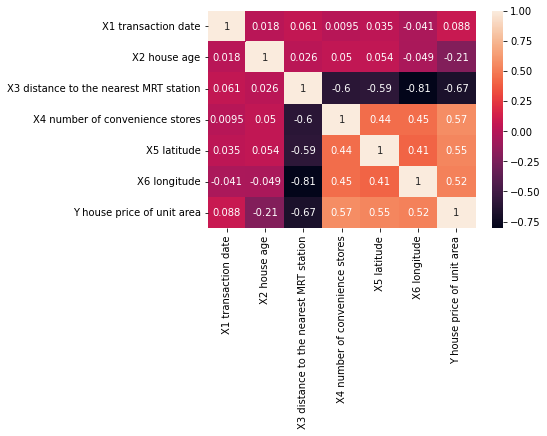

In [ ]:
sns.heatmap(data = matrix, annot=True)

In [ ]:
#the data column does not seem to have much effect on the outcome, it is kinda confusing as well. Drop it and add 1s for X1 instead
data = data.drop('X1 transaction date', 1)
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
data.describe()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [ ]:
#standardization
s = StandardScaler()
X = pd.DataFrame(s.fit(data).fit_transform(data))

In [ ]:
#add column of 1's
#data.insert(0, "X1", 1)
#X.describe()

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state=5)

In [ ]:
Y = newdata[:, -1].reshape(newdata.shape[0],1)

In [ ]:
X = np.vstack((np.ones((X.shape[0], )), X.T)).T
X_test = np.vstack((np.ones((X_test.shape[0], )), X_test.T)).T

In [ ]:
#newdata = data.values
#Y = newdata[:, -1].reshape(newdata.shape[0],1)
#X = newdata[:, :-1]

In [ ]:
#time to make gradient descent, yay!
# multivariable regression for Gradient descent

def model (x,y, learning_rate, iteration):
  m = 

  
  

